In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import statsmodels.api as sm
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [3]:
datadir = r"C:\Users\My Computer\Documents\MSc Business Analytics\Dissertation"

# Dataset 2

### Load the data 

In [4]:
df = pd.read_excel(datadir + "/Dataset_2.xlsx",
                 dtype={"Year": np.unicode_})

In [5]:
df.head()

,Partner_Country,Industry,FDI,Year,Brexit
0,World,Extraction_of_crude_petroleum_and_natural_gas,7368.93,2013,No
1,Austria,Extraction_of_crude_petroleum_and_natural_gas,0.00,2013,No
2,Belgium,Extraction_of_crude_petroleum_and_natural_gas,0.00,2013,No
3,Brazil,Extraction_of_crude_petroleum_and_natural_gas,0.00,2013,No
4,Bulgaria,Extraction_of_crude_petroleum_and_natural_gas,0.00,2013,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 5 columns):
Partner_Country    5640 non-null object
Industry           5640 non-null object
FDI                5640 non-null float64
Year               5640 non-null object
Brexit             5640 non-null object
dtypes: float64(1), object(4)
memory usage: 220.4+ KB


### Delete rows from the Partner_Country column

In [7]:
df["Partner_Country"].value_counts()

Brazil                               115
Russian Federation                   115
Belgium                              115
Lithuania                            115
Italy                                115
Romania                              115
Spain                                115
Ireland                              115
Latvia                               115
Poland                               115
Hungary                              115
Estonia                              115
Japan                                115
Hong Kong, China                     115
Czech Republic                       115
World                                115
Cyprus                               115
Malta                                115
France                               115
China                                115
Sweden                               115
Area_not_elsewhere_specified         115
Greece                               115
Bulgaria                             115
Germany         

In [8]:
df = df.drop(df[df.Partner_Country == "World"].index)
df = df.drop(df[df.Partner_Country == "Africa_not_elsewhere_specified"].index)
df = df.drop(df[df.Partner_Country == "America_not_elsewhere_specified"].index)
df = df.drop(df[df.Partner_Country == "Area_not_elsewhere_specified"].index)
df = df.drop(df[df.Partner_Country == "Asia_not_elsewhere_specified"].index)
df = df.drop(df[df.Partner_Country == "Europe_not_elsewhere_specified"].index)
df = df.drop(df[df.Partner_Country == "Oceania_not_elsewhere_specified"].index)

In [9]:
df["Partner_Country"].value_counts()

Brazil                               115
Russian Federation                   115
Lithuania                            115
Italy                                115
Romania                              115
Spain                                115
Ireland                              115
Latvia                               115
Poland                               115
Hungary                              115
Estonia                              115
Japan                                115
Hong Kong, China                     115
Czech Republic                       115
Cyprus                               115
Malta                                115
France                               115
China                                115
Sweden                               115
Belgium                              115
Greece                               115
Bulgaria                             115
Austria                              115
Finland                              115
Luxembourg      

### Replace "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values

In [10]:
# Replace all "Unknown" values with Nan
df = df.replace("Unknown",np.NaN)
# do the same with "Data missing or out of range" values
df = df.replace("Data missing or out of range",np.NaN)

# Macroeconomic dataset 

In [11]:
df2 = pd.read_excel(datadir + "/Macroeconomic_indicators.xlsx",
            
                        dtype={"Year": np.unicode_})

In [12]:
df2.head()

,Year,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
0,2013,0.021395,0.639661,0.023898,-132605.80,0.075500,0.023,64106000,0.23,0.61182
1,2014,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398
2,2015,0.023553,0.654545,0.019010,-143676.90,0.053250,0.004,65110000,0.20,0.56683
3,2016,0.019183,0.740634,0.013052,-140349.00,0.048250,0.010,65648000,0.20,0.58498
4,2017,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945


In [13]:
df2 = df2.replace("Not known", np.NaN)
df2 = df2.replace("Data missing or out of range", np.NaN)

# Join dataframes 

In [14]:
df.shape

(5175, 5)

In [15]:
df2.shape

(6, 10)

In [16]:
# merge the two datasets by year
dfx = pd.merge(df, df2, on="Year", how="left")

In [17]:
dfx.shape

(5175, 14)

In [18]:
dfx.head()

,Partner_Country,Industry,FDI,Year,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
0,Austria,Extraction_of_crude_petroleum_and_natural_gas,0.0,2013,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
1,Belgium,Extraction_of_crude_petroleum_and_natural_gas,0.0,2013,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
2,Brazil,Extraction_of_crude_petroleum_and_natural_gas,0.0,2013,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
3,Bulgaria,Extraction_of_crude_petroleum_and_natural_gas,0.0,2013,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
4,Canada,Extraction_of_crude_petroleum_and_natural_gas,0.0,2013,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182


# Train-Test Split 

### Random Sampling 

In [19]:
# Randomly split the full dataset into a training and test part

import sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dfx, test_size=0.25, random_state=7)

# the sizes of the training and test data
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

3881 train and 1294 test instances


### Stratified Sampling 

In [20]:
# Split the full dataset into a training and test part by stratified samping

from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=7)

train_index, test_index = list(stratified_splitter.split(df, df["Brexit"]))[0]
strat_trainset = dfx.loc[train_index]
strat_testset = dfx.loc[test_index]

In [21]:
strat_trainset["Brexit"].value_counts(normalize=True)

No     0.600103
Yes    0.399897
Name: Brexit, dtype: float64

In [22]:
strat_testset["Brexit"].value_counts(normalize=True)

No     0.599691
Yes    0.400309
Name: Brexit, dtype: float64

In [23]:
# the sizes of the training and test data
print(f"There are {strat_trainset.shape[0]} training and {strat_testset.shape[0]} test instances")

There are 3881 training and 1294 test instances


In [24]:
def Brexit_proportions(data):
    return data["Brexit"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.25, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": Brexit_proportions(df),
    "Random test set": Brexit_proportions(rand_test_set),
    "Stratified test set": Brexit_proportions(strat_testset),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
No,0.6,0.604328,0.599691,0.721278,-0.05152
Yes,0.4,0.395672,0.400309,-1.081917,0.07728


In [25]:
# rename the variables 
train_set = strat_trainset
test_set = strat_testset

# Exploratory Data Analysis 

### Quick summary of data 

In [26]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3881 entries, 1084 to 4776
Data columns (total 14 columns):
Partner_Country             3881 non-null object
Industry                    3881 non-null object
FDI                         3881 non-null float64
Year                        3881 non-null object
Brexit                      3881 non-null object
Real_GDP                    3881 non-null float64
Exchange_Rate               3881 non-null float64
Long_Term_Interest_Rates    3881 non-null float64
Current_Account_Balance     3881 non-null float64
Unemployment_Rate           3881 non-null float64
Inflation                   3881 non-null float64
Population                  3881 non-null int64
Corporate_Tax_Rate          3881 non-null float64
Trade_Openess               3881 non-null float64
dtypes: float64(9), int64(1), object(4)
memory usage: 454.8+ KB


### Distribution of numeric variables

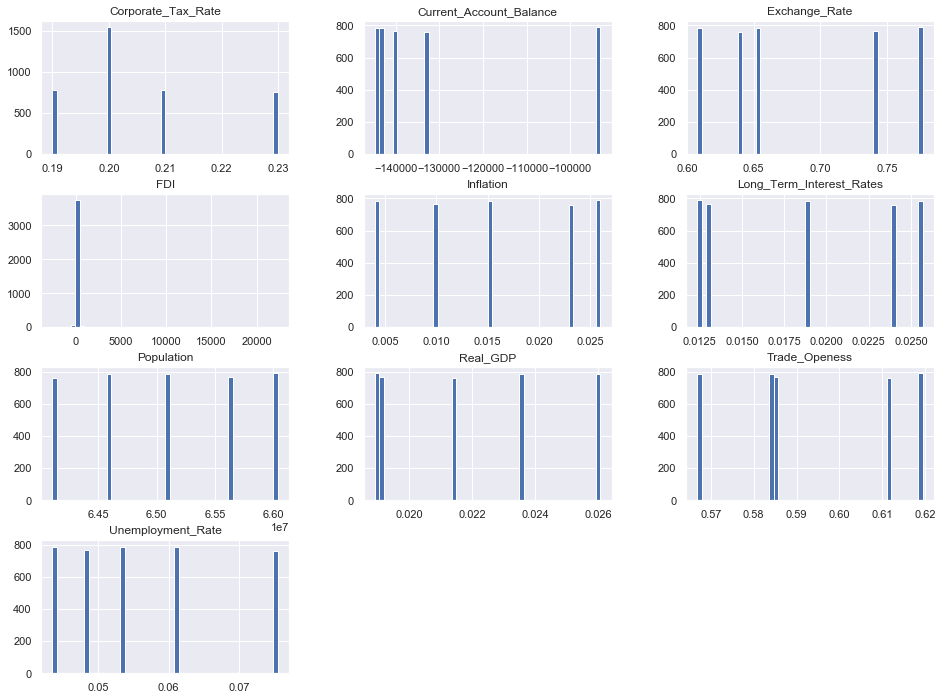

In [27]:
# Creates a histogram for each numerical column
dummy = train_set.hist(bins=50, figsize=(16,12))

In [28]:
# displays descriptive statistics of the numerical variables
train_set.describe()

,FDI,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
count,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3881.000000,3.881000e+03,3881.000000,3881.000000
mean,39.775676,0.021839,0.683963,0.018796,-130803.886514,0.056301,0.015599,6.510411e+07,0.205875,0.593378
std,652.514012,0.002717,0.064225,0.005445,19493.874259,0.011203,0.008131,6.953879e+05,0.013511,0.019461
min,-2580.510000,0.018921,0.607730,0.012358,-144764.900000,0.043500,0.004000,6.410600e+07,0.190000,0.566830
25%,0.000000,0.019183,0.639661,0.013052,-143676.900000,0.048250,0.010000,6.459700e+07,0.200000,0.583980
50%,0.000000,0.021395,0.654545,0.019010,-140349.000000,0.053250,0.015000,6.511000e+07,0.200000,0.584980
75%,0.000000,0.023553,0.740634,0.023898,-132605.800000,0.061417,0.023000,6.564800e+07,0.210000,0.611820
max,22368.000000,0.026075,0.776977,0.025691,-93110.120000,0.075500,0.026000,6.604000e+07,0.230000,0.619450


### Categoric Variables 

In [29]:
# The crosstab function in pandas allows us to display every instance of accident severity and the season it occurred in,
# in a continguency table 

cont_table = pd.crosstab(train_set.Industry, train_set.Partner_Country)

cont_table

Partner_Country,Argentina,Australia,Austria,Belgium,Brazil,Bulgaria,Canada,Chile,China,Croatia,...,South Africa,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of"
Industry,,,,,,,,,,,,,,,,,,,,,
Accomodation_and_food_service_activities,2,3,4,4,4,2,4,5,5,3,...,4,4,4,4,4,4,3,3,5,3
Administrative_and_support_service_activities,0,0,2,5,4,2,4,0,3,2,...,0,3,4,5,0,0,0,4,0,0
Advertising_and_market_research,0,0,4,3,3,4,3,0,4,5,...,0,4,3,4,0,0,0,4,0,0
Architectural_and_engineering_activities_technical_testing_and_analysis,0,0,4,5,5,3,4,0,5,4,...,0,3,5,4,0,0,0,5,0,0
Computer_programming_consultancy_and_related_activities,0,0,2,4,4,4,5,0,4,5,...,0,4,4,2,0,0,0,5,0,0
Construction,3,4,5,3,3,4,3,5,4,5,...,5,4,4,5,4,4,5,5,4,2
Education,0,0,4,4,2,3,5,0,4,3,...,0,4,5,3,0,0,0,4,0,0
Extraction_of_crude_petroleum_and_natural_gas,0,0,5,4,5,4,3,0,1,4,...,0,4,2,4,0,0,0,4,0,0
Financial_and_insurance_activities,3,5,3,3,4,4,5,3,3,2,...,4,4,4,3,5,4,4,5,2,3


### Detecting Outliers

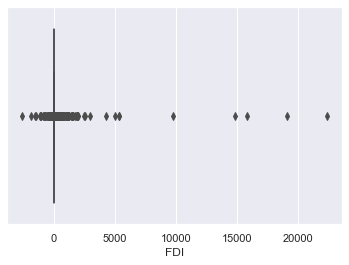

In [30]:
sns.boxplot(x=train_set['FDI'])

# Data Cleaning and Transformation 

### Duplicate rows 

In [31]:
# Detects all duplicates from the training set

train_set.duplicated().sum()

0

In [32]:
# Detects all duplicates from the test set

test_set.duplicated().sum()

0

### Missing Values

In [33]:
# Detects the missing values in the training set

train_set.isnull().sum()

Partner_Country             0
Industry                    0
FDI                         0
Year                        0
Brexit                      0
Real_GDP                    0
Exchange_Rate               0
Long_Term_Interest_Rates    0
Current_Account_Balance     0
Unemployment_Rate           0
Inflation                   0
Population                  0
Corporate_Tax_Rate          0
Trade_Openess               0
dtype: int64

In [34]:
test_set.isnull().sum()

Partner_Country             0
Industry                    0
FDI                         0
Year                        0
Brexit                      0
Real_GDP                    0
Exchange_Rate               0
Long_Term_Interest_Rates    0
Current_Account_Balance     0
Unemployment_Rate           0
Inflation                   0
Population                  0
Corporate_Tax_Rate          0
Trade_Openess               0
dtype: int64

### Dummy Variables 

In [35]:
from sklearn.preprocessing import OneHotEncoder


def get_dummies(train_set, test_set, old_col_name):
    
    one_hot_encoder = OneHotEncoder(categories="auto", sparse=False, drop="first")
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = train_set[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        train_set[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = test_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        test_set[new_col_name] = transformed[:,i]
    
    return train_set, test_set


for col_name in ["Industry","Year","Brexit", "Partner_Country"]:
    train_set, test_set = get_dummies(train_set, test_set, col_name)

# check if the dummies are produced correctly in the trainset
train_set.head()


,Partner_Country,Industry,FDI,Year,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,...,South Africa,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of"
1084,Estonia,Manufacture_of_computer_electronic_and_optical...,0.00,2017,Yes,0.018921,0.776977,0.012358,-93110.12,0.043500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2185,Singapore,Information_and_communication,1.59,2014,No,0.026075,0.607730,0.025691,-144764.90,0.061417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2107,"Korea, Republic of",Information_and_communication,0.00,2013,No,0.021395,0.639661,0.023898,-132605.80,0.075500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3936,United States of America,Architectural_and_engineering_activities_techn...,660.80,2014,No,0.026075,0.607730,0.025691,-144764.90,0.061417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,Slovenia,Extraction_of_crude_petroleum_and_natural_gas,0.00,2014,No,0.026075,0.607730,0.025691,-144764.90,0.061417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Prints the names of all the columns in the dataframe

print(train_set.columns.values)

['Partner_Country' 'Industry' 'FDI' 'Year' 'Brexit' 'Real_GDP'
 'Exchange_Rate' 'Long_Term_Interest_Rates' 'Current_Account_Balance'
 'Unemployment_Rate' 'Inflation' 'Population' 'Corporate_Tax_Rate'
 'Trade_Openess' 'Administrative_and_support_service_activities'
 'Advertising_and_market_research'
 'Architectural_and_engineering_activities_technical_testing_and_analysis'
 'Computer_programming_consultancy_and_related_activities' 'Construction'
 'Education' 'Extraction_of_crude_petroleum_and_natural_gas'
 'Financial_and_insurance_activities' 'Information_and_communication'
 'Legal_and_accounting_activities' 'Management_consultancy_activities'
 'Manufacture_of_chemicals_and_chemical_products'
 'Manufacture_of_computer_electronic_and_optical_products'
 'Manufacture_of_food_products'
 'Manufacture_of_motor_vehicles_trailers_and_semi_trailers'
 'Mining_and_quarrying' 'Professional_scientific_and_technical_activities'
 'Real_estate_activities' 'Scientific_research_and_development'
 'Telecom

In [37]:
test_set.head()

,Partner_Country,Industry,FDI,Year,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,...,South Africa,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of"
1274,Austria,Manufacture_of_motor_vehicles_trailers_and_sem...,0.0,2017,Yes,0.018921,0.776977,0.012358,-93110.12,0.04350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4309,Latvia,Scientific_research_and_development,0.0,2017,Yes,0.018921,0.776977,0.012358,-93110.12,0.04350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563,Hungary,Manufacture_of_food_products,0.0,2015,No,0.023553,0.654545,0.019010,-143676.90,0.05325,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,Latvia,Accomodation_and_food_service_activities,0.0,2013,No,0.021395,0.639661,0.023898,-132605.80,0.07550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5094,New Zealand,Construction,0.0,2016,Yes,0.019183,0.740634,0.013052,-140349.00,0.04825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Prints the names of all the columns in the dataframe

print(test_set.columns.values)

['Partner_Country' 'Industry' 'FDI' 'Year' 'Brexit' 'Real_GDP'
 'Exchange_Rate' 'Long_Term_Interest_Rates' 'Current_Account_Balance'
 'Unemployment_Rate' 'Inflation' 'Population' 'Corporate_Tax_Rate'
 'Trade_Openess' 'Administrative_and_support_service_activities'
 'Advertising_and_market_research'
 'Architectural_and_engineering_activities_technical_testing_and_analysis'
 'Computer_programming_consultancy_and_related_activities' 'Construction'
 'Education' 'Extraction_of_crude_petroleum_and_natural_gas'
 'Financial_and_insurance_activities' 'Information_and_communication'
 'Legal_and_accounting_activities' 'Management_consultancy_activities'
 'Manufacture_of_chemicals_and_chemical_products'
 'Manufacture_of_computer_electronic_and_optical_products'
 'Manufacture_of_food_products'
 'Manufacture_of_motor_vehicles_trailers_and_semi_trailers'
 'Mining_and_quarrying' 'Professional_scientific_and_technical_activities'
 'Real_estate_activities' 'Scientific_research_and_development'
 'Telecom

In [39]:
for col_name in ["Partner_Country","Year","Brexit", "Industry"]:
    del train_set[col_name]
    del test_set[col_name]

In [40]:
train_set.head()

,FDI,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess,...,South Africa,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of"
1084,0.00,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2185,1.59,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2107,0.00,0.021395,0.639661,0.023898,-132605.80,0.075500,0.023,64106000,0.23,0.61182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3936,660.80,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,0.00,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature Scaling 

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Take the target variable out before scaling
trainset_target = train_set["FDI"].values
trainset_predictors = train_set.drop("FDI", axis=1)

# fit_transform returns a NumPy array, so we need to put it back into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target variable back in
train_set["FDI"] = trainset_target

# inspect and look at the newly scaled data
train_set.head()

,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess,Administrative_and_support_service_activities,...,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of",FDI
0,-1.074346,1.448440,-1.182601,1.933870,-1.142748,1.279434,1.346033,-1.175126,1.339870,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.00
1,1.559353,-1.187126,1.266403,-0.716267,0.456704,-0.073626,-0.729335,0.305369,-0.482947,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,1.59
2,-0.163390,-0.689887,0.937059,-0.092447,1.713947,0.910418,-1.435507,1.785864,0.947761,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.00
3,1.559353,-1.187126,1.266403,-0.716267,0.456704,-0.073626,-0.729335,0.305369,-0.482947,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,6.245823,-0.089733,-0.09118,660.80
4,1.559353,-1.187126,1.266403,-0.716267,0.456704,-0.073626,-0.729335,0.305369,-0.482947,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.00


In [42]:
testset_target = test_set["FDI"].values
testset_predictors = test_set.drop("FDI", axis=1)

scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put the non-scaled target variable back in
test_set["FDI"] = testset_target

test_set.head()

,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess,Administrative_and_support_service_activities,...,Spain,Sweden,Switzerland,"Taipei, Chinese",Thailand,Turkey,United States of America,Uruguay,"Venezuela, Bolivarian Republic of",FDI
0,-1.074346,1.448440,-1.182601,1.933870,-1.142748,1.279434,1.346033,-1.175126,1.339870,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.0
1,-1.074346,1.448440,-1.182601,1.933870,-1.142748,1.279434,1.346033,-1.175126,1.339870,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.0
2,0.630904,-0.458109,0.039306,-0.660447,-0.272349,-1.426685,0.008478,-0.434879,-1.364292,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.0
3,-0.163390,-0.689887,0.937059,-0.092447,1.713947,0.910418,-1.435507,1.785864,0.947761,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.0
4,-0.977965,0.882495,-1.055125,-0.489710,-0.718707,-0.688653,0.782246,-0.434879,-0.431557,-0.189838,...,-0.148737,-0.156688,-0.150537,-0.094011,-0.09118,-0.098109,-0.160107,-0.089733,-0.09118,0.0


In [43]:
# Saving the sets of data to appropriate files
train_set.to_excel("train_set1.xlsx")
test_set.to_excel("test_set1.xlsx")

In [51]:
train_set["Construction"].value_counts(normalize=True)

-0.247492    0.942283
 4.040531    0.057717
Name: Construction, dtype: float64

In [52]:
test_set["Construction"].value_counts(normalize=True)

-0.247492    0.945131
 4.040531    0.054869
Name: Construction, dtype: float64